In [20]:
from collections import Counter  # Counting objects
from typing import List, Dict, Tuple  # Type hinting
from itertools import cycle  # Cycle through iterables

import numpy as np  # Numerical computations
from numpy import interp  # Linear interpolation
import pandas as pd  # Data manipulation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.impute import SimpleImputer  # Missing value handling
from sklearn.feature_extraction.text import TfidfVectorizer  # Text to TF-IDF
from sklearn.preprocessing import label_binarize  # Convert labels to binary
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.model_selection import StratifiedKFold, cross_validate  # Cross-validation
from sklearn.ensemble import AdaBoostClassifier  # Ada Boosting Classifier
from sklearn.ensemble import ExtraTreesClassifier  # Extra Trees Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.metrics import confusion_matrix, roc_curve, auc  # Model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  # Metrics

import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Visualization

import joblib  # Save/load objects


In [21]:
# Load your data
filepath = "Folding_misfolding_data.csv"
df = pd.read_csv(filepath)
df.head()


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,PDB ID,Sequence,Polymer Entity Sequence Length,Chain Length,Number of Non-Hydrogen Atoms per Deposited Model,Disulfide Bond Count per Deposited Model,Angle alpha (°),Angle beta (°),Angle gamma (°),Length a (Å),...,Pathway,n_residues,n_atoms,radius_of_gyration,ss_sequence,h_bond_density,phi_psi_ratio,helix_percent,sheet_percent,coil_percent
0,7VZF,MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGF...,154.0,NaN,2628.0,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,363,2628,29.913292,CCCEEECCCCCCCCEECCCCEEECCCCCCEEEEEEEEEECCCCECC...,3.931129,0.999741,0.000000,38.016529,61.983471
1,6H7X,MATVTATTKVPEIRDVTRIERIGAHSHIRGLGLDDALEPRQASQGM...,463.0,NaN,2962.0,NaN,90.0,90.0,120.0,123.023,...,CHAPERONE,422,2962,28.329731,CCCCCCCHHHHHHHHHHHHHHHHCCCCCCEEEEEECCCCCHHHHHH...,3.927224,1.080919,44.743935,23.180593,32.075472
2,6LNI,MKKRPKPGGWNTGGSRYPGQGSPGGNRYPPQGGGGWGQPHGGGWGQ...,210.0,NaN,4920.0,10.0,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,600,4920,44.426434,CCEEEEEEECCCEEEECCCEEEECCCCEEEEEECCCEEEEECCCEC...,3.983333,1.048376,0.000000,47.166667,52.833333
3,9H5G,MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKAE...,352.0,NaN,3300.0,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,432,3300,36.449375,CEEECCEECCEEEEEECCEEEEEECCCCCEEEEECCEEEECCCCEC...,3.907407,1.004692,0.000000,53.240741,46.759259
4,9H5J,MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKAE...,352.0,NaN,3300.0,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,432,3300,36.089943,CEEECCEECCEEEEEECCEEEEEECCCCCEEEEECCEEEEECCEEE...,3.907407,1.005664,0.000000,62.500000,37.500000


In [22]:
df['Refinement Resolution (Å)'] = df['Refinement Resolution (Å)'].apply(lambda res: str(res).split(",")[0]).astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5309 entries, 0 to 5308
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   PDB ID                                            5309 non-null   object 
 1   Sequence                                          5309 non-null   object 
 2   Polymer Entity Sequence Length                    5309 non-null   float64
 3   Chain Length                                      692 non-null    float64
 4   Number of Non-Hydrogen Atoms per Deposited Model  5309 non-null   float64
 5   Disulfide Bond Count per Deposited Model          2116 non-null   float64
 6   Angle alpha (°)                                   4155 non-null   float64
 7   Angle beta (°)                                    4155 non-null   float64
 8   Angle gamma (°)                                   4155 non-null   float64
 9   Length a (Å)       

In [23]:
dropped_columns = ["PDB ID", "Chain Length"]
dropped_df = df[dropped_columns]
df = df.drop(dropped_columns, axis=1)
df


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Sequence,Polymer Entity Sequence Length,Number of Non-Hydrogen Atoms per Deposited Model,Disulfide Bond Count per Deposited Model,Angle alpha (°),Angle beta (°),Angle gamma (°),Length a (Å),Length b (Å),Length c (Å),...,Pathway,n_residues,n_atoms,radius_of_gyration,ss_sequence,h_bond_density,phi_psi_ratio,helix_percent,sheet_percent,coil_percent
0,MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGF...,154.0,2628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,363,2628,29.913292,CCCEEECCCCCCCCEECCCCEEECCCCCCEEEEEEEEEECCCCECC...,3.931129,0.999741,0.000000,38.016529,61.983471
1,MATVTATTKVPEIRDVTRIERIGAHSHIRGLGLDDALEPRQASQGM...,463.0,2962.0,NaN,90.0,90.000,120.0,123.023,123.023,60.880,...,CHAPERONE,422,2962,28.329731,CCCCCCCHHHHHHHHHHHHHHHHCCCCCCEEEEEECCCCCHHHHHH...,3.927224,1.080919,44.743935,23.180593,32.075472
2,MKKRPKPGGWNTGGSRYPGQGSPGGNRYPPQGGGGWGQPHGGGWGQ...,210.0,4920.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,600,4920,44.426434,CCEEEEEEECCCEEEECCCEEEECCCCEEEEEECCCEEEEECCCEC...,3.983333,1.048376,0.000000,47.166667,52.833333
3,MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKAE...,352.0,3300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,432,3300,36.449375,CEEECCEECCEEEEEECCEEEEEECCCCCEEEEECCEEEECCCCEC...,3.907407,1.004692,0.000000,53.240741,46.759259
4,MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKAE...,352.0,3300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PROTEIN FIBRIL,432,3300,36.089943,CEEECCEECCEEEEEECCEEEEEECCCCCEEEEECCEEEEECCEEE...,3.907407,1.005664,0.000000,62.500000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5304,IIGGEFTTIENQPWFAAIYRRHRGGSVTYVCGGSLISPCWVISATH...,247.0,2147.0,5.0,90.0,90.000,120.0,121.276,121.276,43.136,...,HYDROLASE,430,2141,17.329424,CECCEECCHHHCCCEEEEEEECCCCCEEEEEEEEEEECCEEEECHH...,3.878049,0.955184,10.569106,39.837398,49.593496
5305,DRHHHHHHKLLEKQGSCRKKCFDASFRGLENCRCDVACKDRGDCCW...,838.0,14750.0,32.0,90.0,90.000,90.0,96.184,133.640,167.430,...,HYDROLASE,2631,27890,41.087524,CCCCCCCCCCCCCHHHCECCCCHHHHCCECCCHHHHHHHHHCCCCC...,3.827798,1.082489,30.012300,17.773678,52.214022
5306,HHHHHHENLYFQSLKFQCGQKTLRPRFKIIGGEFTTIENQPWFAAI...,281.0,8028.0,20.0,90.0,97.415,90.0,73.043,65.446,111.136,...,HYDROLASE,1318,8027,37.166218,CCCCCCECCEECCHHHCCCEEEEEECCCCCCCEEEEEEEEEECCEE...,3.880079,0.939122,10.307235,36.075322,53.617443
5307,SASKEPDNHVYTRAAVAADAKQCSKIGRDALRDGGSAVDAAIAALL...,353.0,4620.0,2.0,90.0,90.000,90.0,105.717,126.753,104.629,...,HYDROLASE,922,8542,22.285122,CCCEEECCCEEECCCHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHH...,3.892857,1.104911,39.473684,18.233083,42.293233


In [24]:
numerical_columns = df.select_dtypes(include='number').columns
print(numerical_columns)


Index(['Polymer Entity Sequence Length',
       'Number of Non-Hydrogen Atoms per Deposited Model',
       'Disulfide Bond Count per Deposited Model', 'Angle alpha (°)',
       'Angle beta (°)', 'Angle gamma (°)', 'Length a (Å)', 'Length b (Å)',
       'Length c (Å)', 'pH', 'Temp (K)', 'Percent Solvent Content',
       'Refinement Resolution (Å)', 'Matthews Coefficient',
       'Molecular Weight per Deposited Model', 'n_residues', 'n_atoms',
       'radius_of_gyration', 'h_bond_density', 'phi_psi_ratio',
       'helix_percent', 'sheet_percent', 'coil_percent'],
      dtype='object')


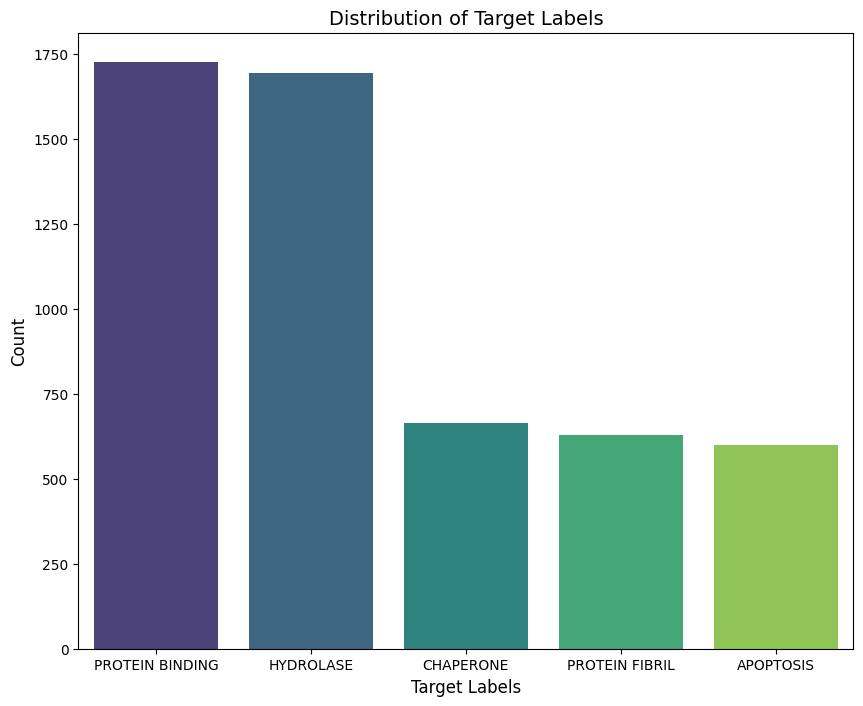

In [25]:
# Count occurrences of each target label
label_counts = df['Pathway'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Target Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Target Labels', fontsize=14)
plt.show()


In [26]:
def generate_kmers(sequence: str, k: int) -> List[str]:
    """
    Generate k-mers from a sequence.
    """
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

def sequence_to_kmer_string(sequence: str, k: int) -> str:
    """
    Convert sequence to space-separated k-mers for TF-IDF processing.
    """
    kmers = generate_kmers(sequence, k)
    return ' '.join(kmers)

# Example usage:
sample_sequence = "MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGF"
sequence_to_kmer_string(sample_sequence, k=5)


'MATKA ATKAV TKAVC KAVCV AVCVL VCVLK CVLKG VLKGD LKGDG KGDGP GDGPV DGPVQ GPVQG PVQGI VQGII QGIIN GIINF IINFE INFEQ NFEQK FEQKE EQKES QKESN KESNG ESNGP SNGPV NGPVK GPVKV PVKVW VKVWG KVWGS VWGSI WGSIK GSIKG SIKGL IKGLT KGLTE GLTEG LTEGL TEGLH EGLHG GLHGF'

In [27]:
def process_sequences_tfidf(sequences: List[str], ss_sequences: List[str], 
                          seq_k: int = 3, ss_k: int = 4) -> Tuple[np.ndarray, List[str]]:
    """
    Process sequences using TF-IDF.
    """
    # Convert sequences to k-mer strings
    seq_kmer_docs = [sequence_to_kmer_string(seq, seq_k) for seq in sequences]
    ss_kmer_docs = [sequence_to_kmer_string(ss, ss_k) for ss in ss_sequences]
    
    # Initialize TF-IDF vectorizers
    seq_vectorizer = TfidfVectorizer(
        analyzer='word',
        token_pattern=r'(?u)\b\w+\b',
        ngram_range=(1, 1),
        min_df=2
    )
    
    ss_vectorizer = TfidfVectorizer(
        analyzer='word',
        token_pattern=r'(?u)\b\w+\b',
        ngram_range=(1, 1),
        min_df=2
    )
    
    # Transform sequences
    seq_features = seq_vectorizer.fit_transform(seq_kmer_docs)
    ss_features = ss_vectorizer.fit_transform(ss_kmer_docs)
    
    # Combine features
    X = np.hstack([seq_features.toarray(), ss_features.toarray()])
    
    feature_names = ([f'seq_kmer_{kmer}' for kmer in seq_vectorizer.get_feature_names_out()] +
                    [f'ss_kmer_{kmer}' for kmer in ss_vectorizer.get_feature_names_out()])
    
    return X, feature_names

# Example usage:
sample_sequence = ["MATKAVCVLKGDGPVQGIIN", "FEQKESNGPVKVWGSIKGLTEGLHGF"]
#processed_seq = sequence_to_kmer_string(sample_sequence, k=5)
sample_ss_sequence = ["CCCEEECCCCCCCCEECCCC", "EEECCCCCCEEEEEEEEEECCCCECC"]
#processed_ss_seq = sequence_to_kmer_string(sample_ss_sequence, k=5)
process_sequences_tfidf(sample_sequence, sample_ss_sequence)


(array([[1.        , 0.81649658, 0.27216553, 0.27216553, 0.13608276,
         0.27216553, 0.27216553, 0.13608276],
        [1.        , 0.68599434, 0.34299717, 0.17149859, 0.17149859,
         0.34299717, 0.34299717, 0.34299717]]),
 ['seq_kmer_gpv',
  'ss_kmer_cccc',
  'ss_kmer_ccce',
  'ss_kmer_ccee',
  'ss_kmer_ceee',
  'ss_kmer_eccc',
  'ss_kmer_eecc',
  'ss_kmer_eeec'])

In [28]:
def extract_sequence_features(sequence):
    """
    Extract chemical properties from amino acid sequence.
    """
    if pd.isna(sequence):
        return pd.Series({
            'sequence_length': 0,
            'hydrophobic_ratio': 0,
            'charged_ratio': 0,
            'polar_ratio': 0
        })
    
    hydrophobic = set('AILMFWV')
    charged = set('DEKR')
    polar = set('STNQYC')
    
    seq_length = len(sequence)
    counts = Counter(sequence)
    
    return pd.Series({
        'sequence_length': seq_length,
        'hydrophobic_ratio': sum(counts[aa] for aa in hydrophobic) / seq_length,
        'charged_ratio': sum(counts[aa] for aa in charged) / seq_length,
        'polar_ratio': sum(counts[aa] for aa in polar) / seq_length
    })

# Example usage:
extract_sequence_features(sample_sequence[0])

sequence_length      20.00
hydrophobic_ratio     0.45
charged_ratio         0.15
polar_ratio           0.20
dtype: float64

In [29]:
def extract_ss_features(ss_sequence):
    """
    Extract features from secondary structure sequence.
    """
    if pd.isna(ss_sequence):
        return pd.Series({
            'helix_segments': 0,
            'sheet_segments': 0,
            'max_helix_length': 0,
            'max_sheet_length': 0,
            'ss_transitions': 0
        })
    
    segments_h = len([x for x in ss_sequence.split('C') if 'H' in x])
    segments_e = len([x for x in ss_sequence.split('C') if 'E' in x])
    max_h = max(len(x) for x in ss_sequence.split('C') if 'H' in x) if 'H' in ss_sequence else 0
    max_e = max(len(x) for x in ss_sequence.split('C') if 'E' in x) if 'E' in ss_sequence else 0
    transitions = sum(1 for i in range(len(ss_sequence)-1) if ss_sequence[i] != ss_sequence[i+1])
    
    return pd.Series({
        'helix_segments': segments_h,
        'sheet_segments': segments_e,
        'max_helix_length': max_h,
        'max_sheet_length': max_e,
        'ss_transitions': transitions
    })

# Example usage:
extract_ss_features(sample_ss_sequence[0])


helix_segments      0
sheet_segments      2
max_helix_length    0
max_sheet_length    3
ss_transitions      4
dtype: int64

In [30]:
def process_features(df, use_tfidf=True):
    """
    Process all features for machine learning model.
    """
    df_processed = df.copy()
    
    # 1. Process numerical features
    numerical_features = df.select_dtypes(include='number').columns
    # Handle missing values and scale numerical features
    num_imputer = SimpleImputer(strategy='median')
    df_processed[numerical_features] = num_imputer.fit_transform(df_processed[numerical_features])

    # Normalize data
    scaler = StandardScaler()
    df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])
    
    # 2. Process sequence features
    sequence_features = df_processed['Sequence'].apply(extract_sequence_features)
    
    # 3. Process secondary structure features
    ss_features = df_processed['ss_sequence'].apply(extract_ss_features)
    
    # 4. Process k-mer features if requested
    if use_tfidf:
        kmer_features, kmer_names = process_sequences_tfidf(
            sequences=df_processed['Sequence'].tolist(),
            ss_sequences=df_processed['ss_sequence'].tolist()
        )
        kmer_df = pd.DataFrame(kmer_features, columns=kmer_names)
        
        # Combine all features
        df_processed = pd.concat([
            df_processed[numerical_features],
            sequence_features,
            ss_features,
            kmer_df
        ], axis=1)
    else:
        # Without k-mer features
        df_processed = pd.concat([
            df_processed[numerical_features],
            sequence_features,
            ss_features
        ], axis=1)
    
    # Handle any remaining missing values
    final_imputer = SimpleImputer(strategy='constant', fill_value=0)
    df_processed = pd.DataFrame(final_imputer.fit_transform(df_processed), 
                                columns=df_processed.columns)
    
    return df_processed

# Example usage:
process_features(df.iloc[:250, ]).head()


,Polymer Entity Sequence Length,Number of Non-Hydrogen Atoms per Deposited Model,Disulfide Bond Count per Deposited Model,Angle alpha (°),Angle beta (°),Angle gamma (°),Length a (Å),Length b (Å),Length c (Å),pH,...,ss_kmer_heee,ss_kmer_hhcc,ss_kmer_hhce,ss_kmer_hhch,ss_kmer_hhec,ss_kmer_hhee,ss_kmer_hhhc,ss_kmer_hhhe,ss_kmer_hhhh,ss_kmer_xxxx
0,-0.830565,-0.271259,-0.040817,-0.025264,-0.309003,-0.171576,-0.160880,-0.135456,-0.069762,0.085257,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.869428,-0.241901,-0.040817,-0.025264,-0.371336,5.047741,1.291112,4.104701,-1.109449,-2.150493,...,0.0,0.120223,0.020711,0.0,0.0,0.0,0.129777,0.0,0.933442,0.0
2,-0.522476,-0.069796,6.452746,-0.025264,-0.309003,-0.171576,-0.160880,-0.135456,-0.069762,0.085257,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.258751,-0.212191,-0.040817,-0.025264,-0.309003,-0.171576,-0.160880,-0.135456,-0.069762,0.085257,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.258751,-0.212191,-0.040817,-0.025264,-0.309003,-0.171576,-0.160880,-0.135456,-0.069762,0.085257,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [31]:
print("Processing features...")

# Initialize the label encoder
label_encoder = LabelEncoder()

# Label encode the target column
target_col = 'Pathway'
df[target_col] = label_encoder.fit_transform(df[target_col])

# Process features and target
X = process_features(df)
y = df[target_col]


Processing features...



Training Random Forest...
--- Performance Metrics for Random Forest ---
Accuracy: [0.93879473 0.94350282 0.9566855  0.94067797 0.95193214]
F1 Score: [0.93570492 0.9359629  0.95178539 0.93564129 0.94658505]
Precision: [0.96035478 0.96204273 0.96794799 0.95219363 0.96566861]
Recall: [0.9174096  0.91667884 0.93871902 0.92281673 0.93151509]
Mean AUC: 0.572 ± 0.346

Training AdaBoost...
--- Performance Metrics for AdaBoost ---
Accuracy: [0.76271186 0.77495292 0.78813559 0.7740113  0.75871819]
F1 Score: [0.68616724 0.71055585 0.72613561 0.71274223 0.68957336]
Precision: [0.89741177 0.90286929 0.90002046 0.89661782 0.88621691]
Recall: [0.63282465 0.65502983 0.67238164 0.65824908 0.6358545 ]
Mean AUC: 0.538 ± 0.363

Training Extra Trees...
--- Performance Metrics for Extra Trees ---
Accuracy: [0.94161959 0.9566855  0.96327684 0.94256121 0.94250707]
F1 Score: [0.94200414 0.95501994 0.96188615 0.94057226 0.94236569]
Precision: [0.96100755 0.96745013 0.97169839 0.95681661 0.96141637]
Recall: [0.

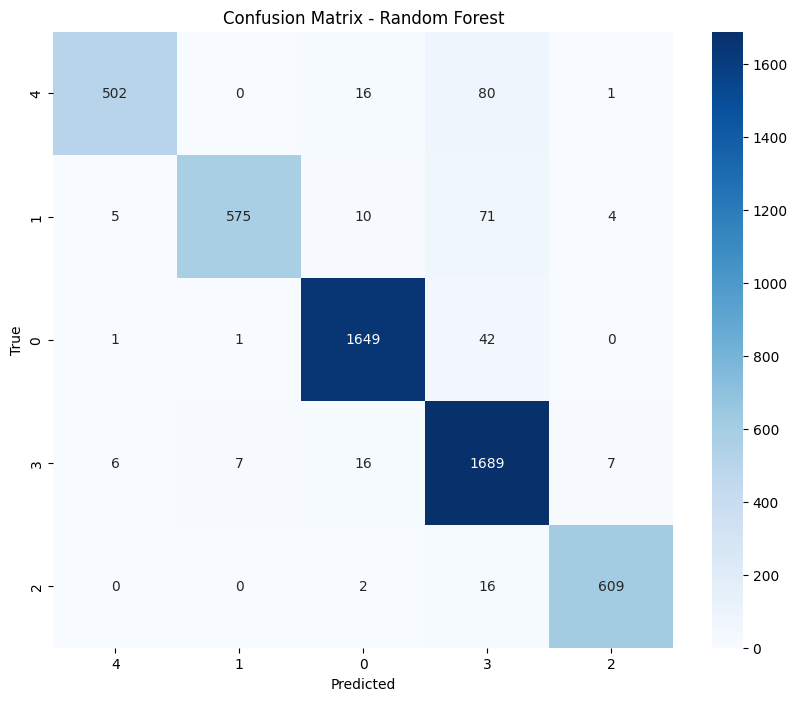

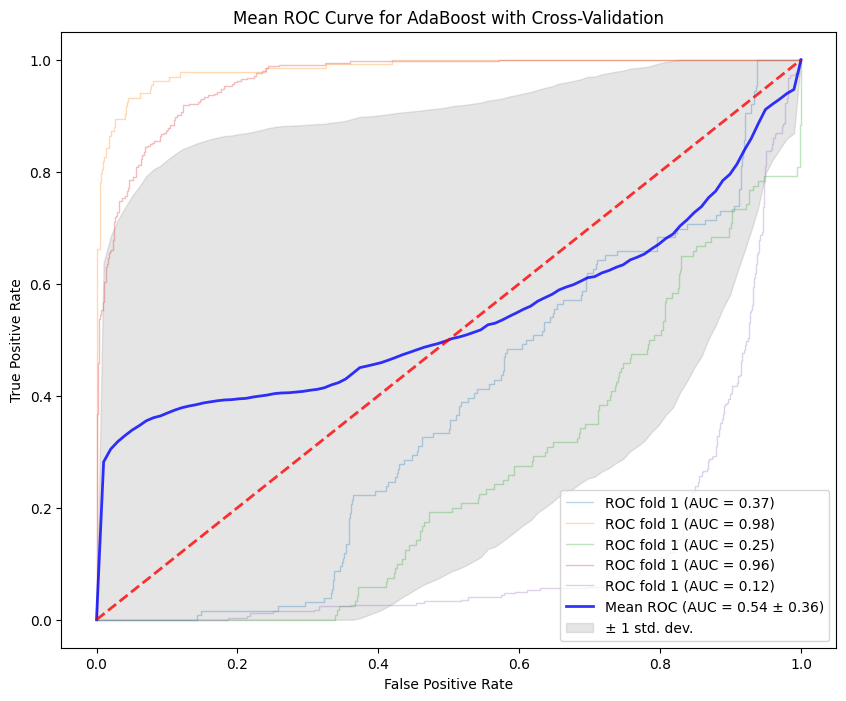

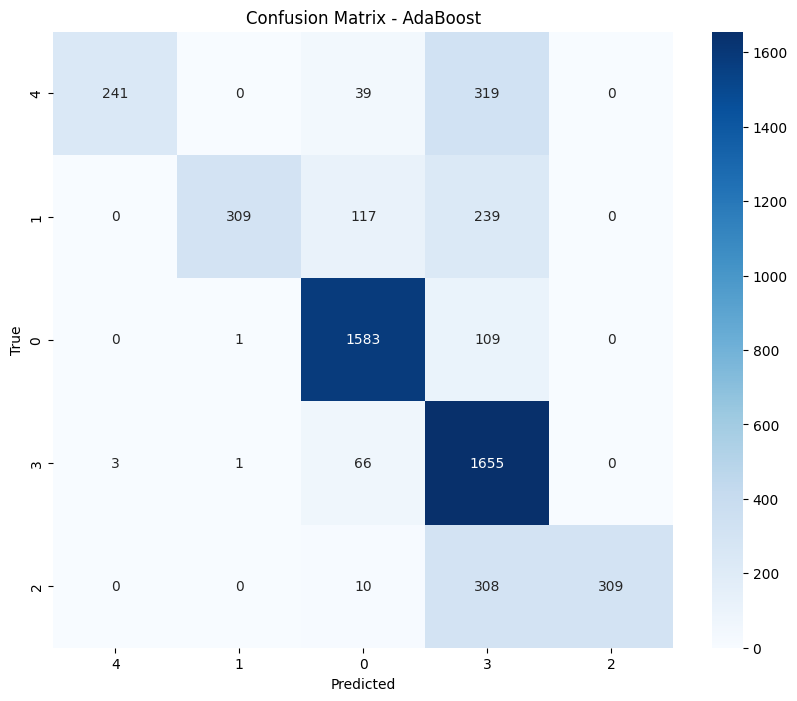

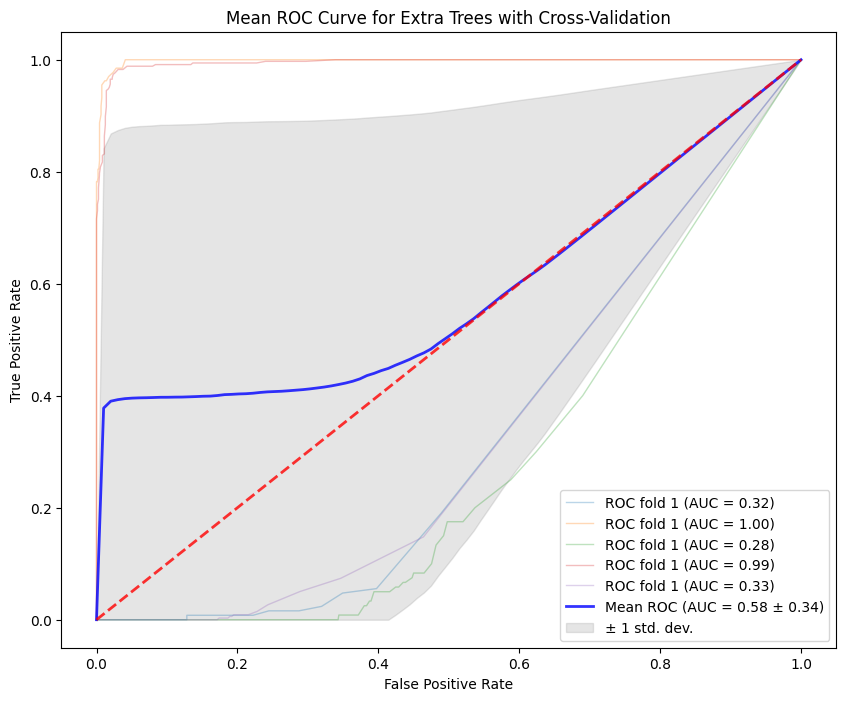

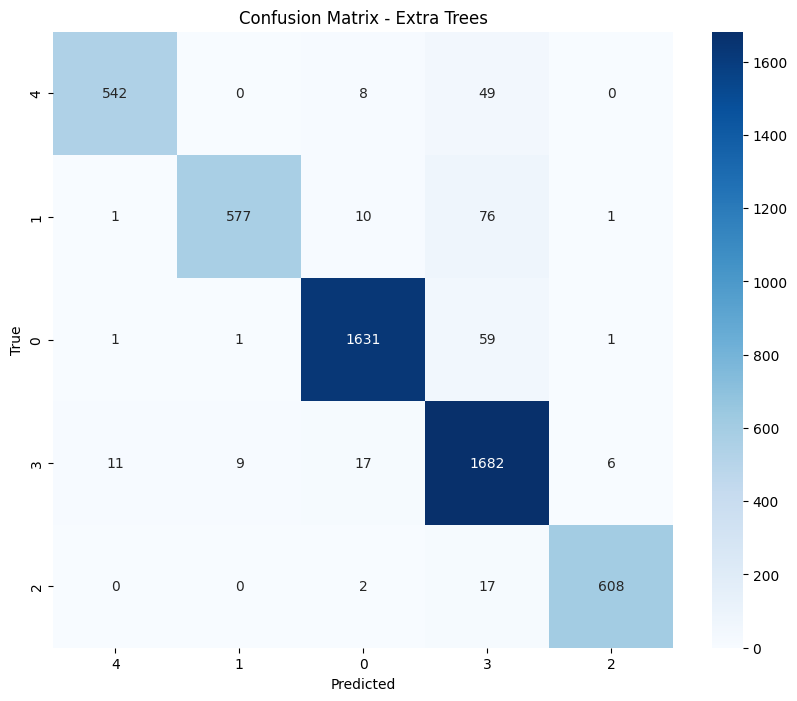

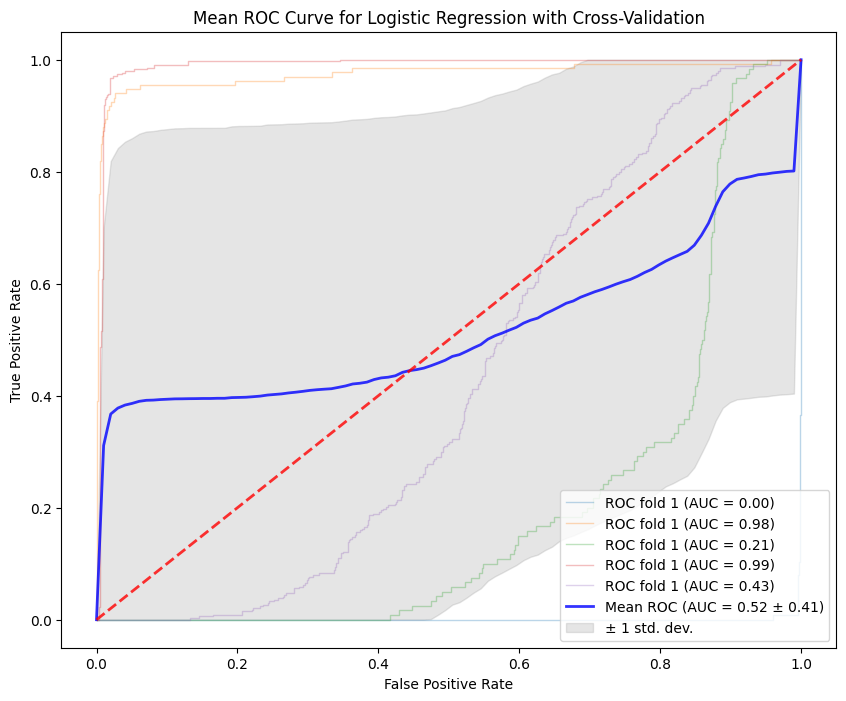

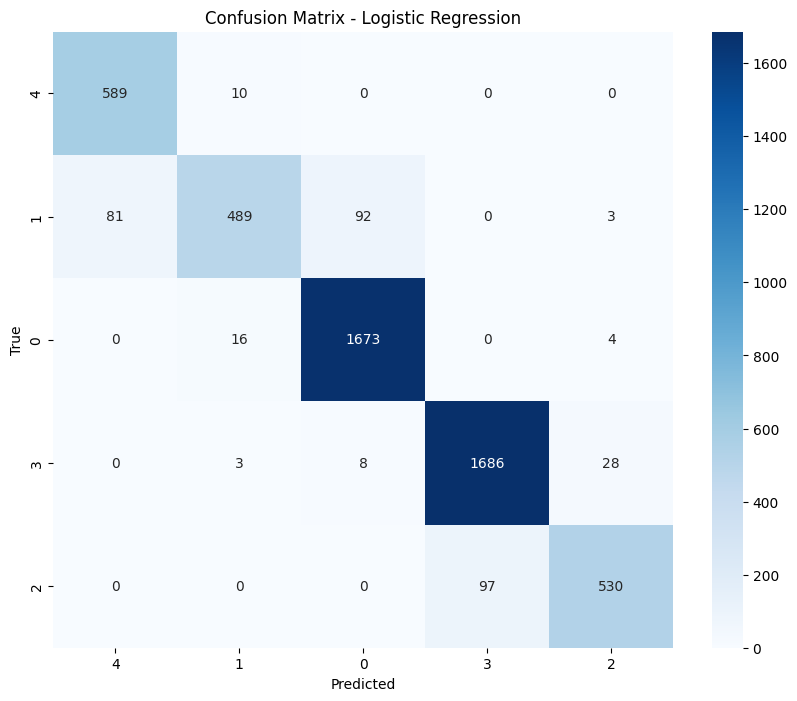

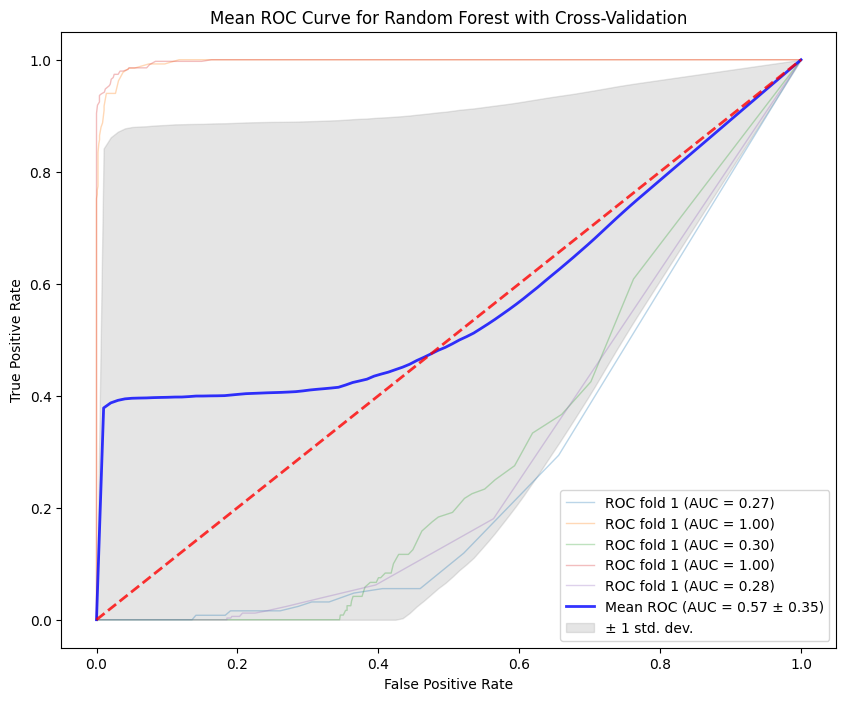

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [32]:
def train_and_evaluate_models(X, y, n_splits=5):
    """
    Train and evaluate multiple models using cross-validation with class imbalance handling.
    """
    # Get class weights to handle imbalance
    class_weights = dict(zip(y.unique(), 
                             y.value_counts().max() / y.value_counts()))

    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            class_weight=class_weights,
            n_jobs=-1,
            random_state=42
        ),
        'AdaBoost': AdaBoostClassifier(
            estimator=RandomForestClassifier(
                n_estimators=25,        # Increased trees per forest
                max_depth=5,            # Slightly deeper trees
                min_samples_split=5,    # More conservative splitting
                min_samples_leaf=2,     # Prevent single-sample leaves
                class_weight=class_weights,
                max_features='sqrt',    # Random feature subset for diversity
                bootstrap=True,         # Enable bootstrapping
                random_state=42
            ),
            n_estimators=25,           # Fewer but stronger RF instances
            learning_rate=0.05,        # Slower learning rate for better generalization
            algorithm='SAMME.R',       # Use real-valued predictions
            random_state=42
        ),
        'Extra Trees': ExtraTreesClassifier(
            n_estimators=100,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            class_weight=class_weights,
            n_jobs=-1,
            random_state=42
        ),
        'Logistic Regression': LogisticRegression(
            max_iter=1000,
            class_weight=class_weights,
            n_jobs=-1,
            random_state=42
        )
    }
    
    # Define scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'f1_macro': 'f1_macro',
        'precision_macro': 'precision_macro',
        'recall_macro': 'recall_macro'
    }
    
    # Setup cross-validation
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Store results for each model
    all_results = {}
    all_figures = {}
    
    # Prepare for multi-class ROC curve
    classes = y.unique()
    n_classes = len(classes)
    y_bin = label_binarize(y, classes=classes)
    
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Perform cross-validation for standard metrics
        cv_results = cross_validate(
            model,
            X,
            y,
            cv=cv,
            scoring=scoring,
            return_train_score=True,
            n_jobs=-1
        )
        
        # Initialize arrays for ROC curve
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        all_predictions = []
        all_true_values = []
        
        # Create figures
        fig_roc, ax_roc = plt.subplots(figsize=(10, 8))
        
        for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y_bin[train_idx], y_bin[test_idx]
            
            # Fit model
            model.fit(X_train, y.iloc[train_idx])
            
            # Get predictions
            y_pred = model.predict(X_test)
            y_score = model.predict_proba(X_test)
            
            # Store for confusion matrix
            all_predictions.extend(y_pred)
            all_true_values.extend(y.iloc[test_idx])
            
            # Calculate ROC curve for each class
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
                tprs.append(interp(mean_fpr, fpr, tpr))
                tprs[-1][0] = 0.0
                roc_auc = auc(fpr, tpr)
                aucs.append(roc_auc)
                
                if fold == 0:
                    ax_roc.plot(fpr, tpr, lw=1, alpha=0.3,
                             label=f'ROC fold {fold+1} (AUC = {roc_auc:.2f})')
        
        # Plot mean ROC curve
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        
        ax_roc.plot(mean_fpr, mean_tpr, color='b',
                 label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
                 lw=2, alpha=.8)
        
        # Add standard deviation area
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax_roc.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                          label=r'± 1 std. dev.')
        
        # ROC plot formatting
        ax_roc.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
        ax_roc.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title(f'Mean ROC Curve for {model_name} with Cross-Validation')
        ax_roc.legend(loc="lower right")
        
        # Create and plot confusion matrix
        cm = confusion_matrix(all_true_values, all_predictions)
        fig_cm, ax_cm = plt.subplots(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=classes, yticklabels=classes, ax=ax_cm)
        ax_cm.set_xlabel('Predicted')
        ax_cm.set_ylabel('True')
        ax_cm.set_title(f'Confusion Matrix - {model_name}')

        print(f"--- Performance Metrics for {model_name} ---")
        print(f"Accuracy: {cv_results['test_accuracy']}")
        print(f"F1 Score: {cv_results['test_f1_macro']}")
        print(f"Precision: {cv_results['test_precision_macro']}")
        print(f"Recall: {cv_results['test_recall_macro']}")
        print(f"Mean AUC: {mean_auc:.3f} ± {std_auc:.3f}")
        
        # Store results
        all_results[model_name] = {
            'Test Accuracy': np.mean(cv_results['test_accuracy']),
            'Test F1': np.mean(cv_results['test_f1_macro']),
            'Test Precision': np.mean(cv_results['test_precision_macro']),
            'Test Recall': np.mean(cv_results['test_recall_macro']),
            'Mean AUC': mean_auc,
            'Std AUC': std_auc,
            'Confusion Matrix': cm,
            'Classes': classes
        }
        
        all_figures[model_name] = (fig_roc, fig_cm)
    
    return all_results, all_figures

# Train and evaluate all models
results, figures = train_and_evaluate_models(X, y)

# Print results for all models
#for model_name, model_results in results.items():
#    print(f"\n{model_name} Results:")
#    for metric in ['Test Accuracy', 'Test F1', 'Test Precision', 'Test Recall']:
#        print(f"{metric}: {model_results[metric]:.3f}")
#    print(f"Mean AUC: {model_results['Mean AUC']:.3f} ± {model_results['Std AUC']:.3f}")

# Show and save plots for all models
for model_name, (fig_roc, fig_cm) in figures.items():
    # Show plots
    plt.figure(fig_roc.number)
    plt.show()
    plt.figure(fig_cm.number)
    plt.show()
    
    # Save plots
    fig_roc.savefig(f'{model_name.lower().replace(" ", "_")}_roc_curve.png', bbox_inches='tight', dpi=300)
    fig_cm.savefig(f'{model_name.lower().replace(" ", "_")}_confusion_matrix.png', bbox_inches='tight', dpi=300)

# Close all plots to free memory
plt.close('all')


In [33]:
# Perform train-test split
test_size = 0.2
print(f"Splitting data with test_size = {test_size}")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size, 
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Splitting data with test_size = 0.2
Training set size: 4247
Test set size: 1062


In [34]:
# Calculate class weights from training data
class_weights = dict(zip(
    y_train.unique(),
    y_train.value_counts().max() / y_train.value_counts()
))

# Train final model on full training set
print("\nTraining final model on full training set...")
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight=class_weights,
    n_jobs=-1,
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate on test set
print("\nEvaluating model on test set...")
test_predictions = final_model.predict(X_test)
test_probabilities = final_model.predict_proba(X_test)



Training final model on full training set...

Evaluating model on test set...


In [35]:
test_results = {
    'Test Accuracy': accuracy_score(y_test, test_predictions),
    'Test F1': f1_score(y_test, test_predictions, average='macro'),
    'Test Precision': precision_score(y_test, test_predictions, average='macro'),
    'Test Recall': recall_score(y_test, test_predictions, average='macro')
}

# Print test set results
print("\nTest Set Results:")
for metric, value in test_results.items():
    print(f"{metric}: {value:.3f}")

# Feature importance
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)


# Print top features
print("\nTop 10 Most Important Features:")
print(importances.head(10))



Test Set Results:
Test Accuracy: 0.929
Test F1: 0.924
Test Precision: 0.954
Test Recall: 0.903

Top 10 Most Important Features:
                             feature  importance
15                           Pathway    0.040007
8016                    ss_kmer_cccc    0.009859
22                     sheet_percent    0.009248
21                     helix_percent    0.008996
8038                    ss_kmer_eecc    0.008883
32                    ss_transitions    0.008751
8042                    ss_kmer_eeee    0.008282
0     Polymer Entity Sequence Length    0.007886
26                     charged_ratio    0.007801
8035                    ss_kmer_ecee    0.007693


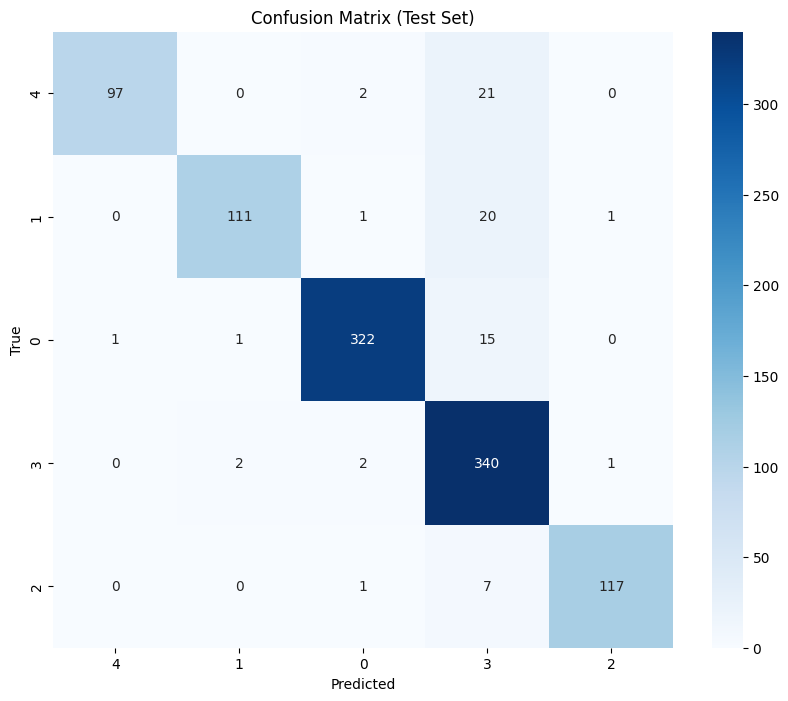

In [36]:
# Create confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)
fig_test_cm, ax_cm = plt.subplots(figsize=(10, 8))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y.unique(), yticklabels=y.unique(), ax=ax_cm)
ax_cm.set_xlabel('Predicted')
ax_cm.set_ylabel('True')
ax_cm.set_title('Confusion Matrix (Test Set)')
fig_test_cm.show()


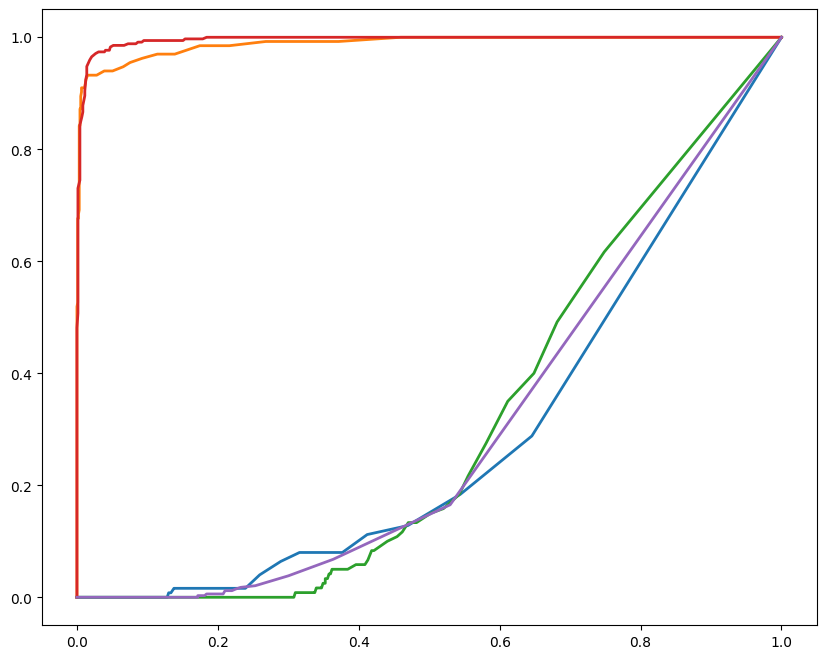

In [37]:
# Calculate ROC curve for test set
test_bin = label_binarize(y_test, classes=y.unique())
test_probabilities = final_model.predict_proba(X_test)

fig_test_roc, ax_roc = plt.subplots(figsize=(10, 8))
for i, class_name in enumerate(y.unique()):
    fpr, tpr, _ = roc_curve(test_bin[:, i], test_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, lw=2,
               label=f'{class_name} (AUC = {roc_auc:.2f})')

fig_test_roc.show()


In [38]:
# Save model and feature names
model_path = "folding_misfolding_predictions_model.joblib"
print(f"Saving model to {model_path}...")
joblib.dump({
    'model': final_model,
    'feature_names': X.columns.tolist(),
    'target_classes': list(y.unique()),
    'class_weights': class_weights
}, model_path)


Saving model to folding_misfolding_predictions_model.joblib...


['folding_misfolding_predictions_model.joblib']